In [74]:
pip install torchvision

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torchvision
from torchvision import datasets, models, transforms
import torch.nn.functional as F
import torch.utils.data
from PIL import Image

In [76]:
normalize_mean = [0.485, 0.456, 0.406]
normalize_std = [0.229, 0.224, 0.225]

In [68]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

In [78]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), # Resize and crop to 224x224
        transforms.RandomHorizontalFlip(), # Data augmentation
        transforms.ToTensor(),
        transforms.Normalize(normalize_mean, normalize_std)
    ]),
    'test': transforms.Compose([ # Add transformations for the test set
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(normalize_mean, normalize_std)
    ]),
}


In [96]:
class_names = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum', 'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily', 'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium', 'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen ', 'watercress', 'canna lily', 'hippeastrum ', 'bee balm', 'ball moss', 'foxglove', 'bougainvillea', 'camellia', 'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily']

In [97]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [98]:
import scipy.io
mat = scipy.io.loadmat('data/flowers-102/setid.mat')

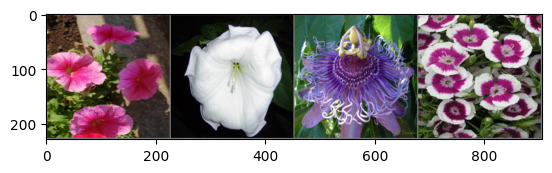

petunia | thorn apple | passion flower | sweet william


In [99]:
BATCH_SIZE = 16

# Показываю картинку
imshow(torchvision.utils.make_grid(images))
print(*[class_names[i] for i in labels], sep=" | ")

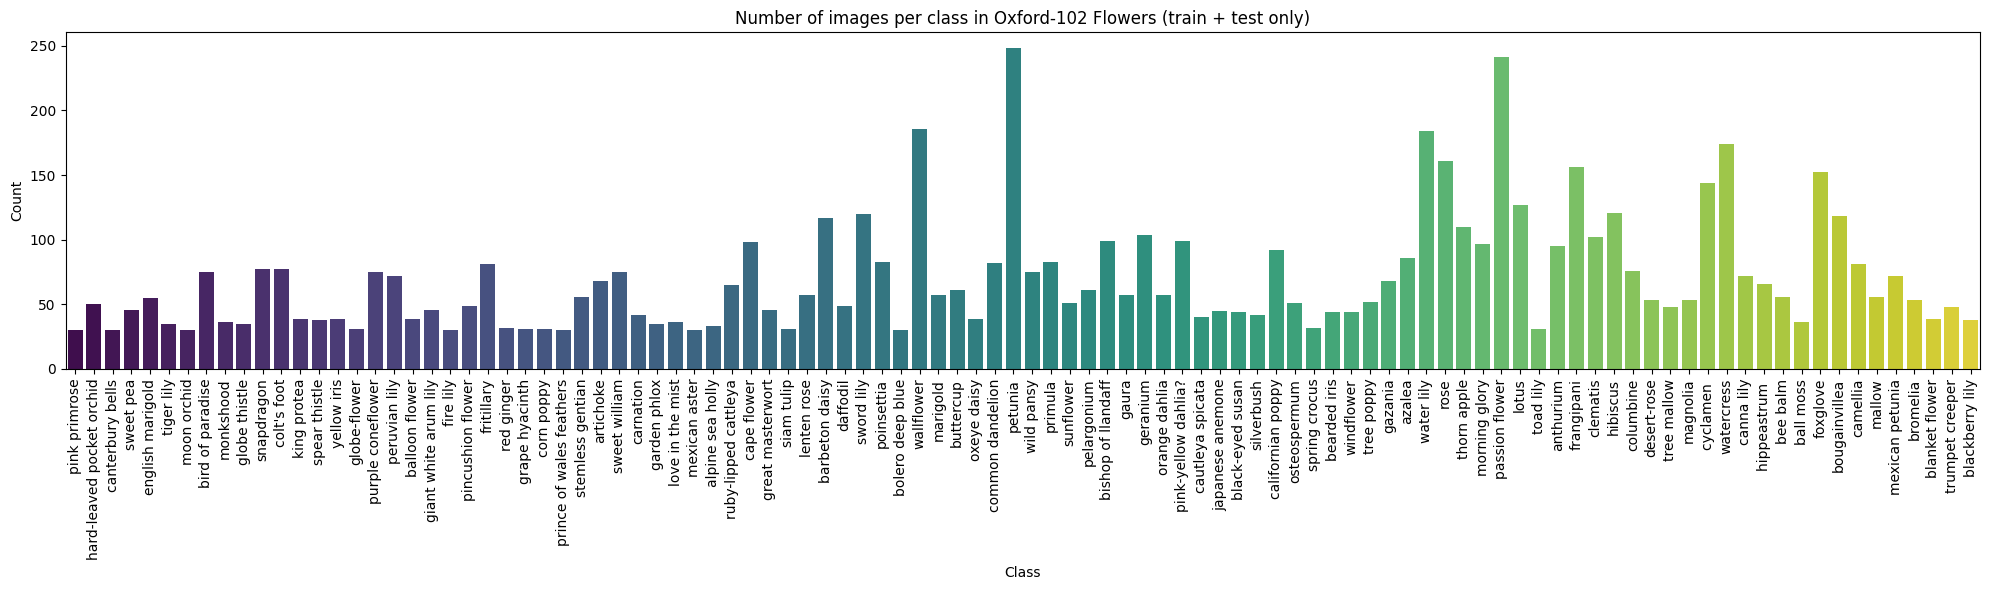

In [100]:

import matplotlib.pyplot as plt
import seaborn as sns
import torchvision

# Загрузка только train и test частей датасета
train_dataset = torchvision.datasets.Flowers102(root='./data', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.Flowers102(root='./data', split='test', transform=transform, download=True)

# Объединение меток и перевод в 0-based (метки изначально от 1 до 102)
labels = [label - 1 for label in (train_dataset._labels + test_dataset._labels)]

# Построение гистограммы
plt.figure(figsize=(20,6))
sns.countplot(x=labels, palette='viridis')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)
plt.title("Number of images per class in Oxford-102 Flowers (train + test only)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
#CNN

In [101]:
import torch.nn as nn
import torch.nn.functional as F

class DeepConvNet(torch.nn.Module):
# Implement your network
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

# Implement forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        out = self.fc3(x)
        return out


net = DeepConvNet(num_classes=102)


In [102]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [103]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class DeepConvNet(torch.nn.Module):
    # Implement your network
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Dynamically calculate the size of the flattened layer
        # Pass a dummy tensor through the conv and pool layers
        x = torch.randn(1, 3, 224, 224) # Assuming input image size is 224x224
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        self._to_linear = x.view(x.size(0), -1).size(1)


        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes) # Changed output size to num_classes

# Implement forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        out = self.fc3(x)
        return out


net = DeepConvNet(num_classes=102) # Changed num_classes to 102

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

device = "cuda"
net = net.to(device)

for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())


        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print('Finished Training')

# Save the trained model
torch.save(net.state_dict(), 'flower_cnn.pth')

[1,   100] loss: 4.625
[1,   200] loss: 4.540
[1,   300] loss: 4.500
[1,   400] loss: 4.491
[1,   500] loss: 4.491
[1,   600] loss: 4.459
[1,   700] loss: 4.479
[1,   800] loss: 4.468
[1,   900] loss: 4.425
[1,  1000] loss: 4.480
[1,  1100] loss: 4.375
[1,  1200] loss: 4.413
[1,  1300] loss: 4.327
[1,  1400] loss: 4.458
[1,  1500] loss: 4.349
[2,   100] loss: 4.326
[2,   200] loss: 4.319
[2,   300] loss: 4.290
[2,   400] loss: 4.342
[2,   500] loss: 4.283
[2,   600] loss: 4.196
[2,   700] loss: 4.203
[2,   800] loss: 4.156
[2,   900] loss: 4.248
[2,  1000] loss: 4.131
[2,  1100] loss: 4.136
[2,  1200] loss: 4.179
[2,  1300] loss: 4.157
[2,  1400] loss: 4.146
[2,  1500] loss: 4.088
[3,   100] loss: 3.963
[3,   200] loss: 4.069
[3,   300] loss: 3.901
[3,   400] loss: 3.947
[3,   500] loss: 3.976
[3,   600] loss: 4.025
[3,   700] loss: 3.863
[3,   800] loss: 3.920
[3,   900] loss: 3.919
[3,  1000] loss: 3.795
[3,  1100] loss: 4.042
[3,  1200] loss: 3.866
[3,  1300] loss: 3.943
[3,  1400] 

In [104]:
import scipy.io

# Load labels
labels = scipy.io.loadmat('./data/flowers-102/imagelabels.mat')['labels'][0]  # shape: (8189,)
# Now labels[0] is the label for 'image_00001.jpg', etc.

# Check sample
print(labels[:5])  # → should be values from 1 to 102

[77 77 77 77 77]


In [105]:
import os

img_dir = './data/flowers-102/jpg'
img_paths = sorted(os.listdir(img_dir))  # ensures order matches labels

# Convert 'image_00001.jpg' to index 0, etc.
print(img_paths[:5])

['image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg']


In [106]:
PATH = './flower_cnn.pth'
torch.save(net.state_dict(), PATH)

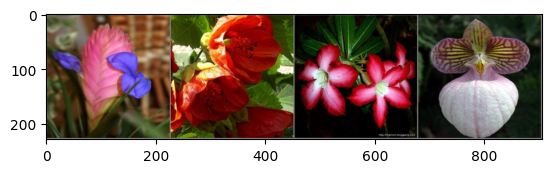

GroundTruth:  ball moss mallow desert-rose hard-leaved pocket orchid


In [107]:
dataiter = iter(test_loader)
test_images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(test_images))
print('GroundTruth: ', ' '.join(f'{class_names[labels[j]]:5s}' for j in range(4)))

In [108]:
net = DeepConvNet(102)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [109]:
outputs = net(test_images)

In [110]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{class_names[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  hippeastrum  tiger lily hibiscus passion flower


In [111]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 100 test images: {100 * correct // total} %')


Accuracy of the network on the 100 test images: 8 %


In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = net.to(device)

class_correct = list(0. for _ in range(102))
class_total = list(0. for _ in range(102))

net.eval()  # Set model to evaluation mode
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i].item()
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
    print('Accuracy of %5s : %2d %%' % (class_names[i], accuracy))


Accuracy of pink primrose : 10 %
Accuracy of hard-leaved pocket orchid : 30 %
Accuracy of canterbury bells :  0 %
Accuracy of sweet pea : 20 %
Accuracy of english marigold :  0 %
Accuracy of tiger lily :  0 %
Accuracy of moon orchid : 20 %
Accuracy of bird of paradise : 30 %
Accuracy of monkshood :  0 %
Accuracy of globe thistle : 10 %


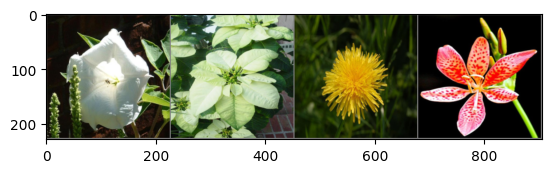

GroundTruth: lotus lotus lotus lotus


In [73]:
imshow(torchvision.utils.make_grid(test_images))
print('GroundTruth: ' + ' '.join(f'{class_names[labels[j]]:5s}' for j in range(4)))